# 统计学习导论第二次作业
作业任务：使用sklearn库自带手写数字分类数据和鸢尾花分类数据，利用Logistic回归实现离散选择（多分类）

姓名：欧阳瑞志、班级：统计22、学号：220403102

## 一、手写数字数据多分类
### 1.1 数据导入

输入数据形状 (1797, 64)
输出数据形状 (1797,)


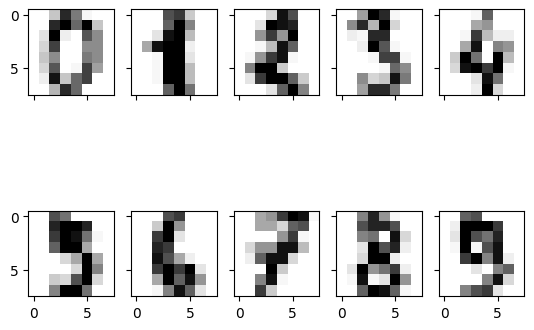

In [2]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## 导入sklearn自带的手写数字数据集
digits = load_digits()
print('输入数据形状', digits.data.shape)
print('输出数据形状', digits.target.shape)

# 获取输入数据和输出数据
X = digits.data
y = digits.target
 
#  展示前十个数据的图像看看
fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )
ax = ax.flatten()
for i in range(10):
    ax[i].imshow(digits.data[i].reshape((8, 8)), cmap='Greys', interpolation='nearest')
plt.savefig(fname="手写数字数据前十个示例数据.png")

### 1.2 训练集、验证集和测试集的划分
60%训练集、20%验证集、20%的测试集  
训练集：训练模型参数  
验证集：判断模型好坏、防止过拟合  
测试集：用来预测  
添加验证集的目的是为了防止模型训练后直接进入预测集，导致模型训练时参数的训练有“作弊”嫌疑，因此分离开来，提高模型的泛化能力，增强鲁棒性  
随机种子默认设置

In [11]:
# 划分训练集 80% 和测试集 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练集划分为训练集 60% 和测试集 20%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### 1.3 Logistic回归模型

In [5]:
# 建立logistic回归模型
model = LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)

### 1.4 验证集上预测

In [6]:
## 在验证集上进行预测
y_val_pred = model.predict(X_val)

# 计算验证集准确率
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"验证集准确率: {val_accuracy}")

# 打印分类报告
print(classification_report(y_val, y_val_pred))

验证集准确率: 0.9638888888888889
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.97      0.93      0.95        42
           2       0.96      0.98      0.97        45
           3       0.93      0.93      0.93        46
           4       1.00      0.97      0.98        33
           5       0.94      0.94      0.94        31
           6       1.00      1.00      1.00        35
           7       1.00      0.97      0.99        36
           8       0.88      0.97      0.92        29
           9       0.97      0.97      0.97        33

    accuracy                           0.96       360
   macro avg       0.96      0.97      0.96       360
weighted avg       0.96      0.96      0.96       360



### 1.5 测试集上预测

In [7]:
## 在测试集上进行预测
y_test_pred = model.predict(X_test)

# 计算测试集准确率
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"测试集准确率: {test_accuracy}")

# 打印测试集分类报告
print(classification_report(y_test, y_test_pred))

测试集准确率: 0.9638888888888889
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.90      1.00      0.95        28
           2       0.97      0.97      0.97        33
           3       0.94      0.97      0.96        34
           4       1.00      0.96      0.98        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.95      0.93      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.97      0.96       360
weighted avg       0.96      0.96      0.96       360



结果解读：测试集预测准确度达0.96，模型预测效果较好

### 1.6 预测结果评估与可视化
#### 1.6.1 混淆矩阵
混淆矩阵中，行代表真实类别，列代表预测类别。  
对角线上元素是各真实类别被正确预测的样本数，数值越大该类别预测越准；  
非对角线元素体现预测错误情况，可据此看出模型易混淆的类别。

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


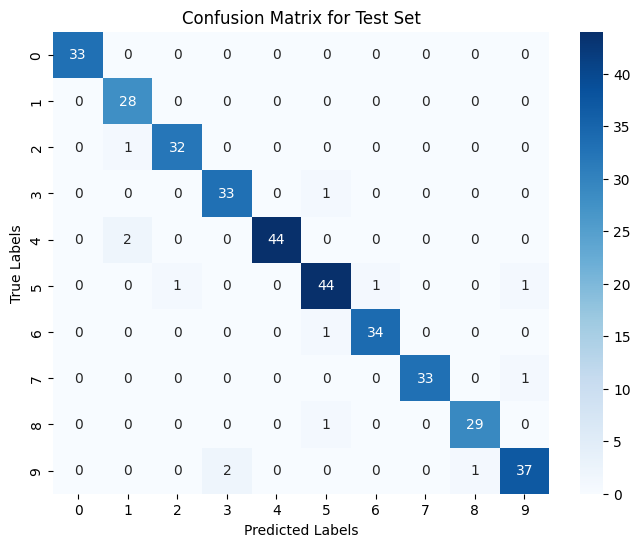

In [8]:
## 可视化绘图
# 计算测试集的混淆矩阵
conf_matrix = confusion_matrix(y_test, y_test_pred)

# 使用seaborn绘制混淆矩阵热图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Test Set")
plt.savefig(fname="手写数字数据测试集混淆矩阵.png")

结果解读：数据基本都在对角线上，但仍存在少量误差，其中错误来自：一个是将2识别为1；一个3识别为5；两个4识别为1；三个5分别识别成2、6、9；一个6识别成5；一个7识别成9；一个8识别成5；两个9识别成3，一个9识别成8.

#### 1.6.2 真实值与预测值拟合情况
横轴代表真实值和预测值的拟合情况  
纵轴代表不同类别

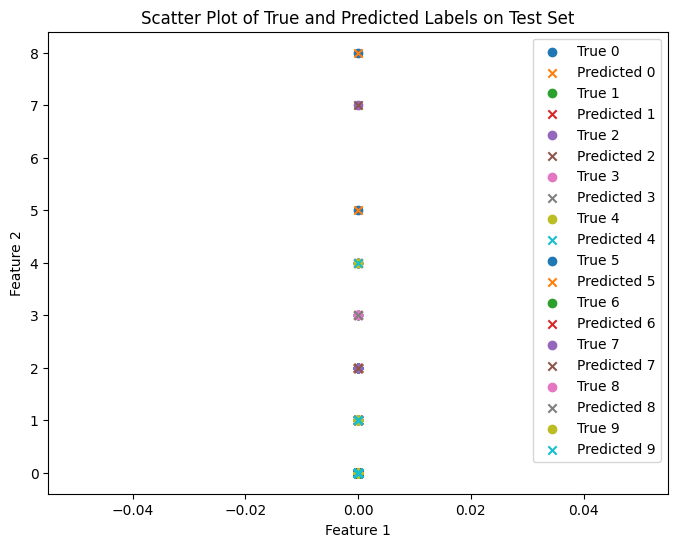

In [9]:
# 绘制测试集真实值和预测值的散点图
plt.figure(figsize=(8, 6))
for i in range(len(digits.target_names)):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f"True {digits.target_names[i]}")
    plt.scatter(X_test[y_test_pred == i, 0], X_test[y_test_pred == i, 1], marker='x', label=f"Predicted {digits.target_names[i]}")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of True and Predicted Labels on Test Set")
plt.legend()
plt.savefig(fname="手写数字数据测试集真实值和预测值散点图.png")

结果解读：预测值与真实值全部重合，预测结果较好

## 二、鸢尾花数据多分类
### 2.1 数据导入

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## 导入sklearn自带的鸢尾花数据集
iris = load_iris()
print('输入数据形状', iris.data.shape)
print('输出数据形状', iris.target.shape)

# 获取输入数据和输出数据
X = iris.data
y = iris.target

输入数据形状 (150, 4)
输出数据形状 (150,)


### 2.2 训练集、验证集和测试集的划分
60%训练集、20%验证集、20%的测试集  
训练集：训练模型参数  
验证集：判断模型好坏、防止过拟合  
测试集：用来预测  
添加验证集的目的是为了防止模型训练后直接进入预测集，导致模型训练时参数的训练有“作弊”嫌疑，因此分离开来，提高模型的泛化能力，增强鲁棒性  
随机种子默认设置

In [12]:
# 划分训练集 80% 和测试集 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练集划分为训练集 60% 和测试集 20%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### 2.3 Logistic回归模型

In [13]:
# 建立logistic回归模型
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### 2.4 验证集上预测

In [14]:
## 在验证集上进行预测
y_val_pred = model.predict(X_val)

# 计算验证集准确率
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"验证集准确率: {val_accuracy}")

# 打印分类报告
print(classification_report(y_val, y_val_pred))

验证集准确率: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 2.5 测试集上预测

In [15]:
## 在测试集上进行预测
y_test_pred = model.predict(X_test)

# 计算测试集准确率
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"测试集准确率: {test_accuracy}")

# 打印测试集分类报告
print(classification_report(y_test, y_test_pred))

测试集准确率: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



结果解读：测试集上准确率为1，可见预测效果非常好

### 2.6 预测结果评估与可视化
#### 2.6.1 混淆矩阵
混淆矩阵中，行代表真实类别，列代表预测类别。  
对角线上元素是各真实类别被正确预测的样本数，数值越大该类别预测越准；  
非对角线元素体现预测错误情况，可据此看出模型易混淆的类别。

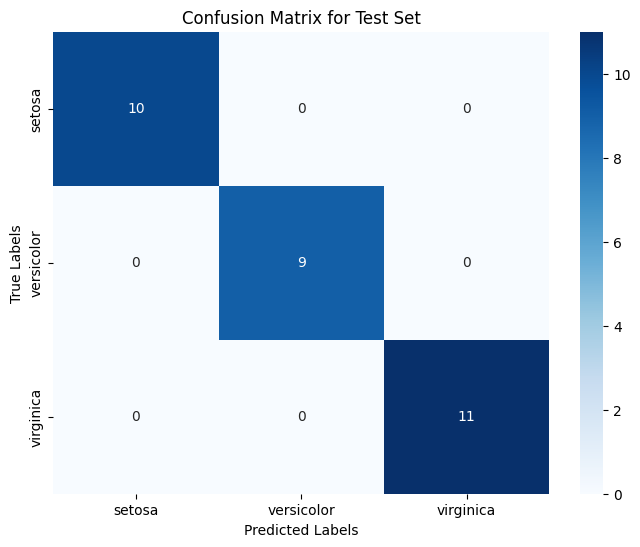

In [16]:
## 可视化绘图
# 计算测试集的混淆矩阵
conf_matrix = confusion_matrix(y_test, y_test_pred)

# 使用seaborn绘制混淆矩阵热图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Test Set")
plt.savefig(fname="鸢尾花数据测试集混淆矩阵.png")

结果解读：值都在对角线上，没有错误预测，模型训练得很好

#### 2.6.2 真实值与预测值拟合情况
横轴代表真实值和预测值的拟合情况  
纵轴代表不同类别

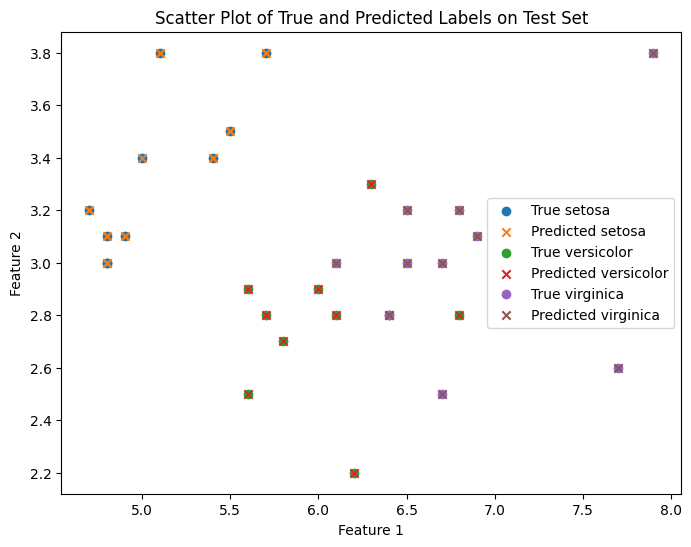

In [18]:
# 绘制测试集真实值和预测值的散点图
plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f"True {iris.target_names[i]}")
    plt.scatter(X_test[y_test_pred == i, 0], X_test[y_test_pred == i, 1], marker='x', label=f"Predicted {iris.target_names[i]}")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of True and Predicted Labels on Test Set")
plt.legend()
plt.savefig(fname="鸢尾花数据测试集真实值和预测值散点图.png")

结果解读：预测值与实际值均重合，模型预测效果好